<a href="https://colab.research.google.com/github/timmtimm1/Capstone/blob/main/ANN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
tf.__version__

'2.15.0'

In [ ]:
# Loading the data
mnist = tf.keras.datasets.mnist
# Load the MNIST dataset and split it into training and testing sets
# The 'load_data()' function returns two tuples:
# (x_train, y_train) for the training data and labels
# (x_test, y_test) for the testing data and labels
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Normalize the training and testing data by scaling the pixel values to be between 0 and 1
# This is done by dividing each pixel value by 255.0 (the maximum pixel value)
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train.shape

(60000, 28, 28)

In [ ]:
#Building model
# Create a Sequential model
# A Sequential model is a linear stack of layers
model = tf.keras.models.Sequential([
  # Flatten the input
  # The Flatten layer reshapes the input data from (28, 28) to a 1D array of 784 elements
  # This is necessary before feeding it into the Dense layer
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  # Add a Dense (fully connected) layer with 128 units and ReLU activation
  # This layer has 128 neurons, each neuron is connected to every element of the flattened input
  # The ReLU activation function is used to introduce non-linearity
  tf.keras.layers.Dense(128, activation='relu'),
  # Add a Dropout layer with a rate of 0.2
  # Dropout is a regularization technique where randomly selected neurons are ignored during training
  # Dropout rate of 0.2 means 20% of the neurons will be dropped during each update cycle
  tf.keras.layers.Dropout(0.2),
  # Add another Dense layer with 10 units and softmax activation
  # This layer outputs a probability distribution over 10 classes (digits 0-9)
  # The softmax activation function ensures that the output values sum up to 1
  tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
#Compiling the model
model.compile(optimizer='adam',   # Use the Adam optimizer
              loss='sparse_categorical_crossentropy', # Use sparse categorical cross-entropy as the loss function
              metrics=['accuracy']) # Track accuracy as a metric

In [ ]:
# Training the model
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=25)

Epoch 1/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2962 - accuracy: 0.9144 - val_loss: 0.1397 - val_accuracy: 0.9601
Epoch 2/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1429 - accuracy: 0.9568 - val_loss: 0.1030 - val_accuracy: 0.9708
Epoch 3/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1073 - accuracy: 0.9672 - val_loss: 0.0881 - val_accuracy: 0.9719
Epoch 4/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0895 - accuracy: 0.9726 - val_loss: 0.0835 - val_accuracy: 0.9744
Epoch 5/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0741 - accuracy: 0.9764 - val_loss: 0.0741 - val_accuracy: 0.9768
Epoch 6/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0657 - accuracy: 0.9790 - val_loss: 0.0746 - val_accuracy: 0.9781
Epoch 7/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0608 - accuracy: 0.9808 - val_loss: 0.0672 - val_accuracy:

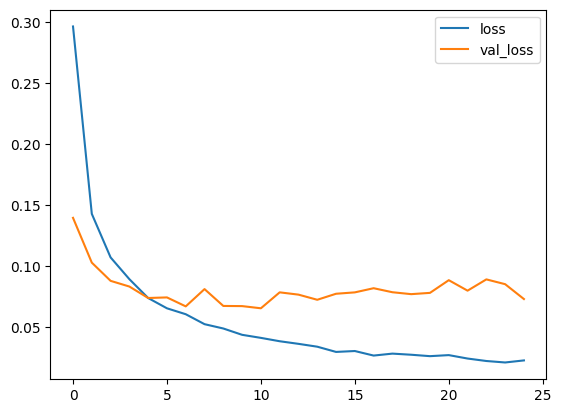

In [ ]:
# Plotting the loss per iteration

import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

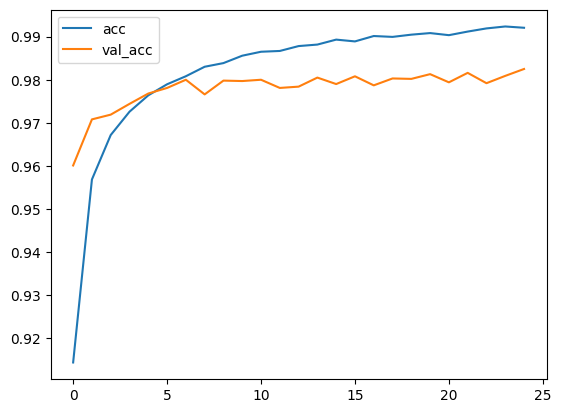

In [ ]:
# Plotting the accuray

plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [ ]:
print(model.evaluate(x_test, y_test))
# loss: 0.0698 - accuracy: 0.9819 with 15 iteractions
# loss: 0.0721 - accuracy: 0.9817 with 20 iteractions
# loss: 0.0800 - accuracy: 0.9805 with 17 iteractions

313/313 [==============================] - 1s 2ms/step - loss: 0.0732 - accuracy: 0.9825
[0.07324483245611191, 0.9825000166893005]


In [ ]:
# Plotting the confusuin Matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

313/313 [==============================] - 0s 1ms/step
Confusion matrix, without normalization
[[ 970    0    2    0    0    0    4    1    3    0]
 [   0 1127    3    0    0    0    1    1    3    0]
 [   2    1 1014    1    2    0    2    5    5    0]
 [   0    0    4  994    0    1    0    4    4    3]
 [   1    0    4    0  966    0    4    1    1    5]
 [   2    0    0   14    1  864    6    0    2    3]
 [   2    2    1    1    5    3  940    0    4    0]
 [   0    3    6    2    0    0    0 1009    4    4]
 [   2    0    2    3    4    1    2    2  956    2]
 [   0    3    0    5   10    3    0    3    0  985]]


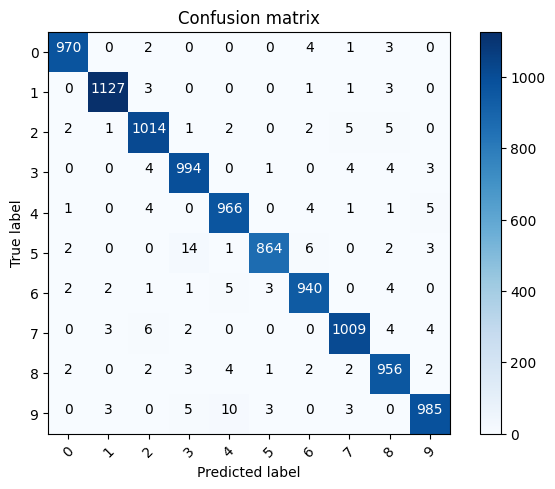

In [ ]:
# Plotting the confusuin Matrix
# Define a function to plot the confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
      # Normalize the confusion matrix if the normalize parameter is set to True
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print('Confusion matrix, without normalization')

  print(cm) # Print the confusion matrix
  # Plot the confusion matrix
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)
    # Format the confusion matrix values

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))



Text(0.5, 1.0, 'True label: 4 Predicted: 2')

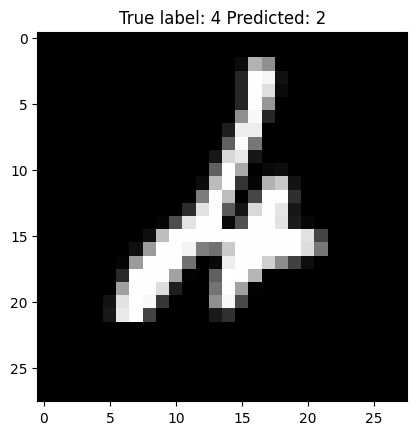

In [ ]:
# Print Misclassified
#This line finds the indices of the test samples where the predicted labels (p_test) do not match the true labels (y_test).
# The np.where function returns a tuple of arrays, and [0] extracts the first element, which is the array of indices.
Misclassified_idx = np.where(p_test != y_test)[0]
#This line randomly selects one index from the array of misclassified indices.
i = np.random.choice(Misclassified_idx)
# Visualize the misclassified image
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]))